In [96]:
# Your libraries here
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [97]:
# change encoding bcs utf-8 does not work

df = pd.read_csv("avg_data/Group3_Mid_Minute_Averaged.csv", encoding="iso-8859-9")
display(df)

df2= pd.read_excel("avg_data/G3-OO-HAND_Minute_Averaged.xlsx")
display(df2)

df3= pd.read_excel("avg_data/Group3_Cube_Minute_Averaged.xlsx")
display(df3)

df4= pd.read_excel("avg_data/Relative_Humidity_Minute_Averaged_Filled.xlsx")
display(df4)

df5= pd.read_excel("Water property_heat of vaporisation.xlsx")
display(df5)

#df6= pd.read_excel("Dry air properties_P=93.85 kPa.xlsx")
#display(df6)


,Minute,T_air (Â°C),T_globe (Â°C),Air_speed (m/s)
0,2025-03-14 09:15:00,28.741800,29.006867,0.049613
1,2025-03-14 09:16:00,28.765183,29.030917,0.081071
2,2025-03-14 09:17:00,28.793133,29.055250,0.038375
3,2025-03-14 09:18:00,28.809783,29.081517,0.064431
4,2025-03-14 09:19:00,28.803800,29.094033,0.049200
...,...,...,...,...
116,2025-03-14 11:11:00,20.098900,20.401033,0.603045
117,2025-03-14 11:12:00,20.087133,20.396333,0.150158
118,2025-03-14 11:13:00,20.016600,20.400250,0.117937
119,2025-03-14 11:14:00,19.936733,20.404433,0.120670


,Minute,Heat Flux (W/m2),T_sk (°C),T_core (°C)
0,2025-03-14 09:15:00,48.971797,31.772733,37.000000
1,2025-03-14 09:16:00,53.364071,31.984933,37.000000
2,2025-03-14 09:17:00,56.073324,32.224700,37.014750
3,2025-03-14 09:18:00,59.862382,32.473203,37.033678
4,2025-03-14 09:19:00,59.726710,32.690667,37.049467
...,...,...,...,...
115,2025-03-14 11:10:00,118.632435,29.295500,37.261750
116,2025-03-14 11:11:00,120.725948,29.190400,37.270750
117,2025-03-14 11:12:00,120.016979,29.086695,37.280068
118,2025-03-14 11:13:00,112.557141,29.047067,37.290000


,Minute,Mean Radiant Temperature (*C),UP LW IRRAD (*C),NORTH LW IRRAD (*C),EAST LW IRRAD (*C),SOUTH LW IRRAD (*C),WEST LW IRRAD (*C),DOWN LW IRRAD (*C)
0,2025-03-14 09:15:00,29.592667,29.166444,29.845111,30.164667,30.111111,29.324222,28.942000
1,2025-03-14 09:16:00,29.630444,29.203778,29.850000,30.185333,30.201111,29.365556,28.972444
2,2025-03-14 09:17:00,29.643778,29.216222,29.918889,30.181778,30.270222,29.350444,28.926444
3,2025-03-14 09:18:00,29.636000,29.307333,29.930667,30.304667,29.889111,29.416444,28.966667
4,2025-03-14 09:19:00,29.727556,29.366444,29.851778,30.344222,30.402000,29.416444,28.980889
...,...,...,...,...,...,...,...,...
116,2025-03-14 11:11:00,22.099778,20.581111,22.012667,22.045111,24.135778,22.905556,20.918444
117,2025-03-14 11:12:00,22.072000,20.672222,21.964444,22.057111,24.060444,22.843333,20.834444
118,2025-03-14 11:13:00,22.035000,20.662727,21.876136,21.976364,24.203182,22.770455,20.717955
119,2025-03-14 11:14:00,22.080444,20.663778,22.111778,21.918000,24.214222,22.840889,20.731556


,Minute,"RH, %"
0,2025-03-14 09:15:00,48.000000
1,2025-03-14 09:16:00,48.000000
2,2025-03-14 09:17:00,48.000000
3,2025-03-14 09:18:00,48.000000
4,2025-03-14 09:19:00,48.000000
...,...,...
116,2025-03-14 11:11:00,33.752250
117,2025-03-14 11:12:00,33.865450
118,2025-03-14 11:13:00,33.855083
119,2025-03-14 11:14:00,33.932467


,t_a [oC],L_v [kJ/kg]
0,15,2465
1,16,2463
2,17,2461
3,18,2458
4,19,2456
5,20,2454
6,21,2451
7,22,2449
8,23,2446
9,24,2444


In [98]:
# convective res
M = 58.
ta = df["T_air (Â°C)"]
q_conv_res = 0.0014 * M * (34-ta)
display(q_conv_res)

0      0.426966
1      0.425067
2      0.422798
3      0.421446
4      0.421931
         ...   
116    1.128769
117    1.129725
118    1.135452
119    1.141937
120    1.147031
Name: T_air (Â°C), Length: 121, dtype: float64

In [99]:
# functions
def calculate_f_cl(I_cl):
    """
    Calculates clothing factor (f_cl).
    I_cl: Clothing insulation [clo]
    """
    if I_cl <= 0.5:
        f_cl = 1 + 0.31 * I_cl
    else:
        f_cl = 1.05 + 0.645 * I_cl
    return f_cl


In [100]:
calculate_f_cl(0.38)

1.1178

In [101]:
def calculate_h_conv(v_a):
    if v_a < 0.2:
        return 3.1 
    else:
        return 8.3 * (v_a)**(0.6)

In [102]:
calculate_h_conv(0.23)

3.4364877014334163

In [103]:
def Q_rad(h_rad, f_cl, T_cl, T_mrt):
    """
    Radiative heat loss from the body.
    T_cl, T_mrt: [°C]
    Returns Q_rad in [W/m²]
    """
    return h_rad * f_cl * (T_cl - T_mrt)

In [104]:
Q_rad(5.636, 1.1178, 23.917, 23.5)

2.62706697360001

In [105]:
def Q_conv_skin(h_c, f_cl, T_cl, T_air):
    """
    Convective heat loss from clothing surface.
    Returns Q_conv_skin in [W/m²]
    """
    return h_c * f_cl * (T_cl - T_air)

In [106]:
Q_conv_skin(3.1, 1.1178, 23.917, 25)

-3.752789939999994

In [107]:
def iterate_T_cl(t_skin, t_air, t_mrt, I_cl, v_a, epsilon=0.95, max_iter=100, tol=0.01):
    """

Clothing temperature (T_cl) and h_rad are calculated with iterative solution.

All temperatures [°C], output T_cl [°C], h_rad [W/m2K]
    """
    # Initial Guess
    t_cl = (t_skin + t_air) / 2
    sigma = 5.67e-8  # Stefan-Boltzmann constant
    f_cl = calculate_f_cl(I_cl)
    R_cl = I_cl * 0.155  # [m2K/W]
    f_eff = 0.72 # o The effective radiation area factor f_eff estimated as 0.72 for sitting person

    for i in range(max_iter):

        # calculate h_rad 
        h_rad = 4 * epsilon * sigma * f_eff * (273.15 + ((t_cl + t_mrt) / 2))**3

        # Convective heat transfer coefficient
#        if v_a < 0.2:
#            h_conv = 3.1 
#        else:
#            h_conv = 8.3 * (v_a)**(0.6)
        
        h_conv = calculate_h_conv(v_a)

        # Calculate new T_cl
        # T_cl_new = T_skin - ( (T_skin - T_air) + (T_skin - T_mrt) ) / (1 + f_cl * h_total * R_cl)
        #T_cl_new = T_skin - R_cl * (h_conv * f_cl * (T_cl - T_air) + h_rad * f_cl * (T_cl - T_mrt))

        Q_radi = Q_rad(h_rad, f_cl, t_cl, t_mrt)
        Q_conv = Q_conv_skin(h_conv, f_cl, t_cl, t_air)

        t_cl_new = t_skin - R_cl * (Q_radi + Q_conv)

        # Check error
        if abs(t_cl_new - t_cl) < tol:
            break
        t_cl = t_cl_new

    return t_cl, h_rad, Q_radi, Q_conv

In [108]:
iterate_T_cl(32, 25, 23.5, 0.38, 1.1178, epsilon=0.95, max_iter=100, tol=0.01)

(28.552571722463334, 4.154135428903886, 23.46157931544781, 35.23737233498591)

In [109]:
def Q_conv_resp(M, T_air):
    """
    Convective heat loss via respiration.
    M: metabolic rate [W/m²]
    Returns Q_conv_resp in [W/m²]
    """
    return 0.0014 * M * (34 - T_air)

In [110]:
# convective res
M = 58.2
ta = df["T_air (Â°C)"]
q_conv_res = Q_conv_resp(M, ta)
display(q_conv_res)

0      0.428438
1      0.426533
2      0.424255
3      0.422899
4      0.423386
         ...   
116    1.132662
117    1.133620
118    1.139367
119    1.145875
120    1.150986
Name: T_air (Â°C), Length: 121, dtype: float64

In [111]:
def find_pressures(t_air, t_skin, rh):
    """
    finds p_v,sat and p_v
    """
    p_v_sat_skin = 611 * np.exp((17.08 * t_skin) / (234.18 + t_skin))  # Pa
    p_v_sat_air = 611 * np.exp((17.08 * t_air) / (234.18 + t_air))  # Pa
    p_v_air = rh * p_v_sat_air

    return p_v_sat_skin / 1000, p_v_air / 1000

def calculate_Q_evap_resp(M, p_air_kPa):
    """
    Evaporative heat loss via respiration
    p_air in [kPa]
    Returns Q_E_resp in W/m²
    """
    return 0.0173 * M * (5.87 - p_air_kPa)


def calculate_Q_evap_skin(w, p_sat_skin, p_air, R_cl, f_cl, h_conv, LR=16.5):
    """
    Evaporative heat loss from the skin surface
    All pressures in Pa
    Returns Q_E_skin in W/m²
    p_v_skin –-> water vapour pressure at the skin (normally
assumed to be saturated water vapour pressure p_v_sat at the
skin temperature t_skin )

    """
    h_e = LR * h_conv
    resistance = R_cl + 1 / (f_cl * h_e)
    return w * (p_sat_skin - p_air) / resistance


In [112]:
h = find_pressures(24.3, 32, 0.48)
display(h)

(4.762101389082458, 1.4609440137226615)

In [113]:
from scipy.interpolate import interp1d
import numpy as np

# calculating L_v for intermediate values
# Sıcaklık ve L_v kolonlarını al
T_vals = df5['t_a [oC]'].values
Lv_vals = df5['L_v [kJ/kg]'].values

# Linear interpolation
Lv_interp_function = interp1d(T_vals, Lv_vals, kind='linear', fill_value='extrapolate')

# main function for L_v
def get_Lv(T):
    """
Returns the latent heat of vaporization (L_v) [kJ/kg] for the specified temperature(s) (°C). 
T can be a scalar or an array.
    """
    return Lv_interp_function(T)

In [114]:
def calculate_t_b(T_sk, T_core, alpha=0.2):
    return alpha * T_sk + (1 - alpha) * T_core

def calculate_M_rsw(T_sk, T_b):
    return 4.7e-5 * (T_b - 36.18) * np.exp((T_sk - 33.7) / 10.7)

def calculate_Q_E_rsw(M_rsw, Lv):
    return M_rsw * Lv  # Lv [kJ/kg], Q [W/m²]

def calculate_Q_E_max(p_v_sk, p_v_a, R_v_cl, f_cl, h_e):
    resistance = R_v_cl + 1 / (f_cl * h_e)
    return (p_v_sk - p_v_a) / resistance

def calculate_w(Q_E_rsw, Q_E_max):
    return 0.06 + Q_E_rsw / Q_E_max

def calculate_Q_E_skin(w, p_v_sk, p_v_a, R_v_cl, f_cl, h_e):
    resistance = R_v_cl + 1 / (f_cl * h_e)
    return w * (p_v_sk - p_v_a) / resistance


# main function
def calculate_all_Q_E_skin(T_sk, T_core, Lv, R_v_cl, f_cl, h_conv, T_air, RH, alpha=0.2):
    """
    All procedure: Q_E_skin calculation (W/m²)
    """
    # 1. Mean body temp
    T_b = calculate_t_b(T_sk, T_core, alpha)

    # 2. Sweat rate
    M_rsw = calculate_M_rsw(T_sk, T_b)

    # 3. Regulatory evaporation
    Q_E_rsw = calculate_Q_E_rsw(M_rsw, Lv)

    # 4. Evaporative transfer coeff
    LR = 16.5  # typical value
    h_e = LR * h_conv

    # 5. Vapor pressures
    p_v_sk, p_v_a = find_pressures(T_air, T_sk, RH)  # kPa

    # 6. Max evaporation
    Q_E_max = calculate_Q_E_max(p_v_sk, p_v_a, R_v_cl, f_cl, h_e)

    # 7. Wettedness
    w = calculate_w(Q_E_rsw, Q_E_max)

    # 8. Final Q_E_skin
    Q_E_skin = calculate_Q_E_skin(w, p_v_sk, p_v_a, R_v_cl, f_cl, h_e)

    return {
        "Q_E_skin": Q_E_skin,
        "w": w,
        "Q_E_rsw": Q_E_rsw,
        "Q_E_max": Q_E_max,
        "M_rsw": M_rsw,
        "T_b": T_b,
        "p_v_sk": p_v_sk,
        "p_v_a": p_v_a,
        "h_e": h_e
    }

In [115]:
calculate_all_Q_E_skin(27, 37, 2430, 15, 1.12, 3.1, 24, 0.37, alpha=0.2)

{'Q_E_skin': -0.062201054131341006,
 'w': -0.37886162309258575,
 'Q_E_rsw': -0.07205178331688436,
 'Q_E_max': 0.1641788197590559,
 'M_rsw': -2.9650939636577926e-05,
 'T_b': 35.0,
 'p_v_sk': 3.57162445735171,
 'p_v_a': 1.1060763108793081,
 'h_e': 51.15}


#################
Until here, we defined the function that we will use. Now, we will write the main function that calculates the real values
#################

In [141]:
# First, we try with one value for all parameters

df = pd.read_csv("avg_data/Group3_Mid_Minute_Averaged.csv", encoding="iso-8859-9")
#df2= pd.read_excel("avg_data/G3-OO-HAND_Minute_Averaged.xlsx")
df3= pd.read_excel("avg_data/Group3_Cube_Minute_Averaged.xlsx")   
df4= pd.read_excel("avg_data/Relative_Humidity_Minute_Averaged_Filled.xlsx") 
df5= pd.read_excel("Water property_heat of vaporisation.xlsx")
sens_data = ["avg_data/G3-DCFJ-CHEST_Minute_Averaged.xlsx","avg_data/G3-DCFJ-HAND_Minute_Averaged.xlsx","avg_data/G3-OO-CHEST_Minute_Averaged.xlsx",
             "avg_data/G3-OO-HAND_Minute_Averaged.xlsx","avg_data/G3-SBA-CHEST_Minute_Averaged.xlsx","avg_data/G3-SBA-HAND_Minute_Averaged.xlsx",
            "avg_data/G3-ZAMA-CHEST_Minute_Averaged.xlsx","avg_data/G3-ZAMA-HAND_Minute_Averaged.xlsx"]

df_q_dict = {}
df_q_list = [
    "DCFJ-CHEST",
    "DCFJ-HAND",
    "OO-CHEST",
    "OO-HAND",
    "SBA-CHEST",
    "SBA-HAND",
    "ZAMA-CHEST",
    "ZAMA-HAND"
]

for j in range(8):
    
    df2= pd.read_excel(sens_data[j])
    
    

    
    time_list = []
    q_radi_list   = [] 
    q_conv_list   = [] 
    q_c_resp_list = [] 
    q_e_skin_list = []  
    q_e_resp_list = []  
    
    for i in range(119):
        
        t_air = df["T_air (Â°C)"][i]
        v_a = df["Air_speed (m/s)"][i]
        
        t_skin = df2["T_sk (°C)"][i]
        t_core = df2["T_core (°C)"][i]
        
        t_mrt = df3["Mean Radiant Temperature (*C)"][i]
        
        I_cl = 0.38
        
        f_cl = calculate_f_cl(I_cl)
        
        h_conv = calculate_h_conv(v_a)
        
        M = 58.2
        
        Lv = get_Lv(t_air)
        
        R_v_cl = 0.015
        
        RH = df4["RH, %"][i]/ 100
        
        p_v_sat, p_v_a = find_pressures(t_air, t_skin, RH)
        
        #display(df5)
        #display(RH)
        
        t_cl, h_rad, Q_radi, Q_conv = iterate_T_cl(t_skin, t_air, t_mrt, I_cl, v_a, epsilon=0.95, max_iter=100, tol=0.01)
        Q_c_resp = Q_conv_resp(M, t_air)
        a = calculate_all_Q_E_skin(t_skin, t_core, Lv, R_v_cl, f_cl, h_conv, t_air, RH, alpha=0.2)
        q_evap_sk = a['Q_E_skin']
        Q_e_resp = calculate_Q_evap_resp(M, p_v_a)
        
        #time_list[i] = df['Minute'][i]
        #q_radi_list[i] = Q_radi
        #q_c_sk_list[i] = Q_conv
        #q_c_resp_list[i] = Q_c_resp
        #q_e_skin_list[i] = q_evap_sk
        #q_e_resp_list[i] = Q_e_resp
    
        time_list.append(df['Minute'][i])
        q_radi_list.append(Q_radi)
        q_conv_list.append(Q_conv)
        q_c_resp_list.append(Q_c_resp)
        q_e_skin_list.append(q_evap_sk)
        q_e_resp_list.append(Q_e_resp)

    # Build DataFrame 
    df_Q = pd.DataFrame({
        'Minute': time_list,
        'Q_radi': q_radi_list,
        'Q_c_sk': q_conv_list,
        'Q_c_resp': q_c_resp_list,
        'Q_e_skin': q_e_skin_list,
        'Q_e_resp': q_e_resp_list
    })
    df_Q['Q_total'] = (df_Q['Q_radi'] + df_Q['Q_c_sk'] + df_Q['Q_c_resp'] + df_Q['Q_e_skin'] + df_Q['Q_e_resp'])

    # 'df_Q1', 'df_Q2', ... şeklinde sakla
    # df_q_dict[f'df_Q{j+1}'] = df_Q
    df_q_dict[df_q_list[j]] = df_Q       

In [153]:
#display(df_q_dict)
chest_q_dict = {k: v for k, v in df_q_dict.items() if "CHEST" in k}
hand_q_dict  = {k: v for k, v in df_q_dict.items() if "HAND" in k}

display(len(chest_q_dict))
display(len(hand_q_dict))

df_female = {k: v for k, v in df_q_dict.items() if "DCFJ" in k}
df_male = {k: v for k, v in df_q_dict.items() if "OO" in k or "SBA" in k or "ZAMA" in k}
#chest_q_dict

df_male_oo = {k: v for k, v in df_q_dict.items() if "OO" in k}


4

4

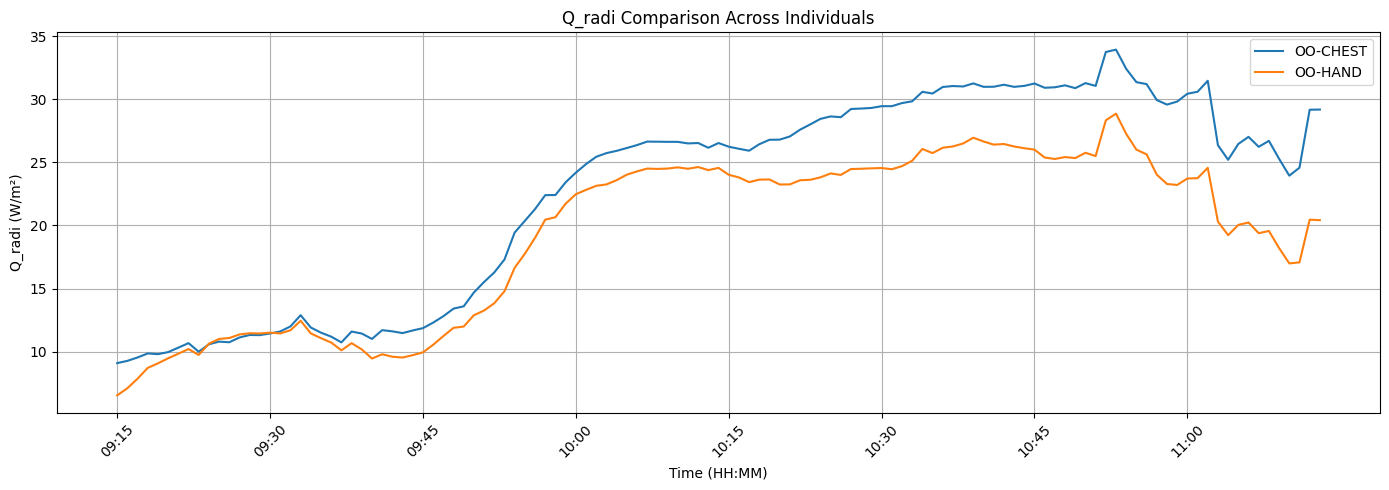

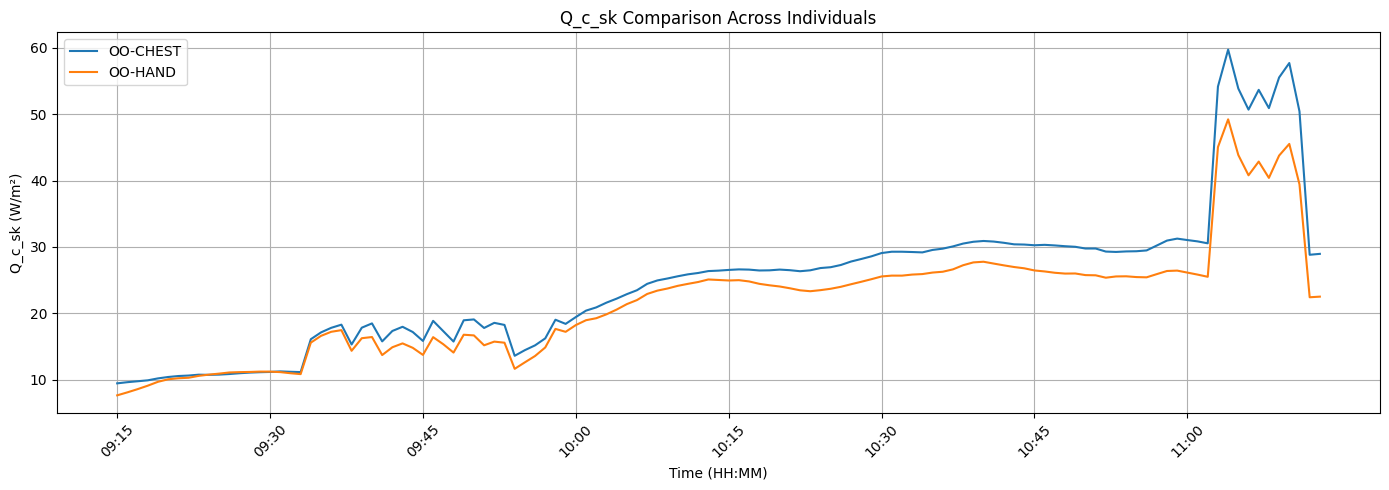

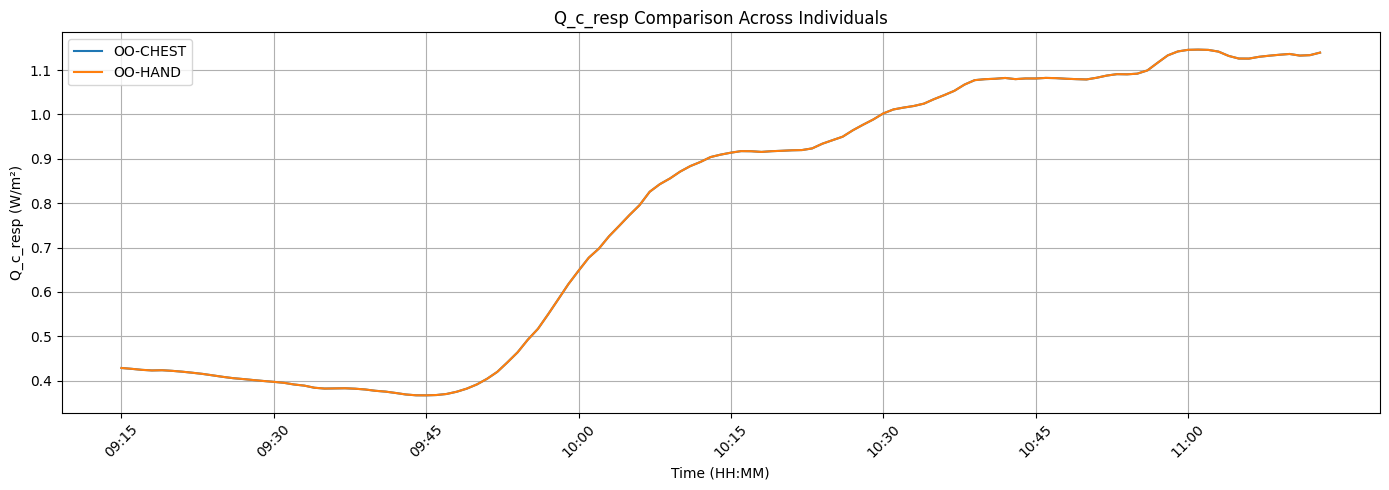

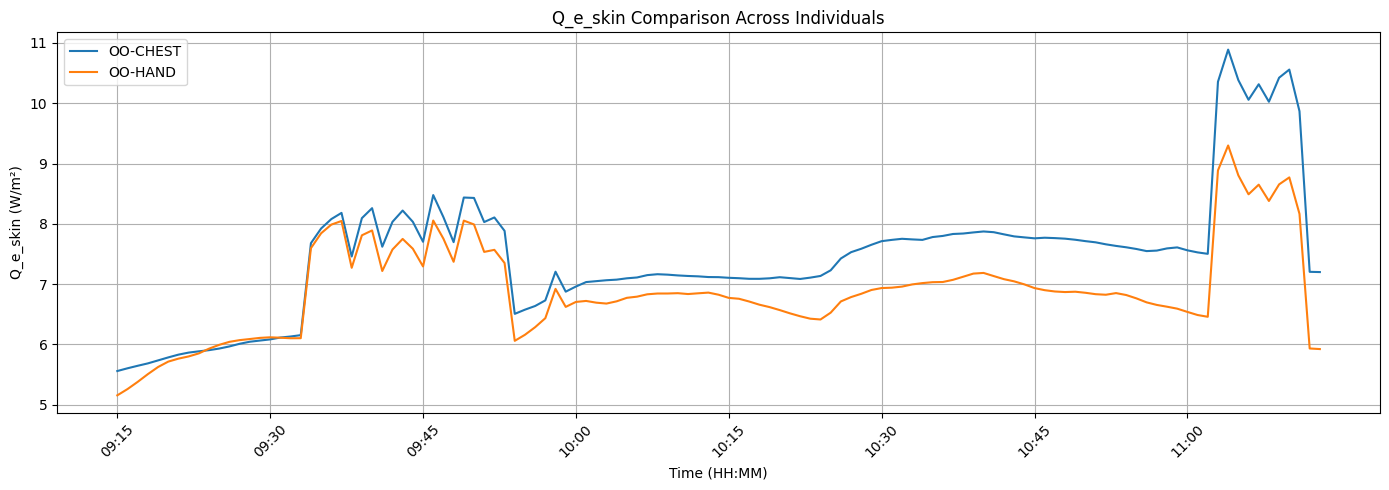

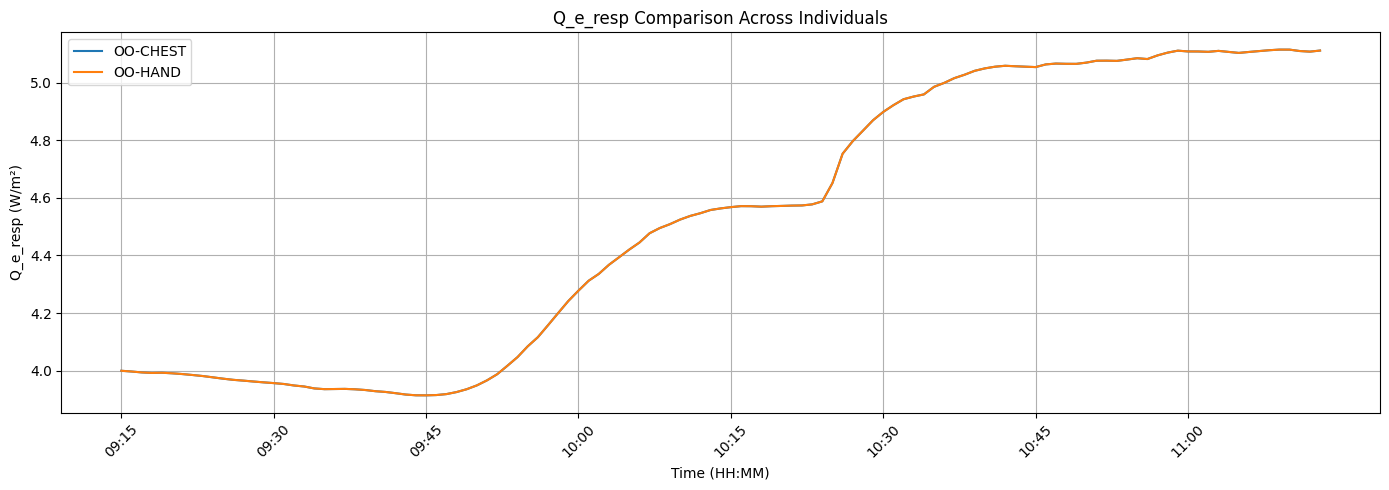

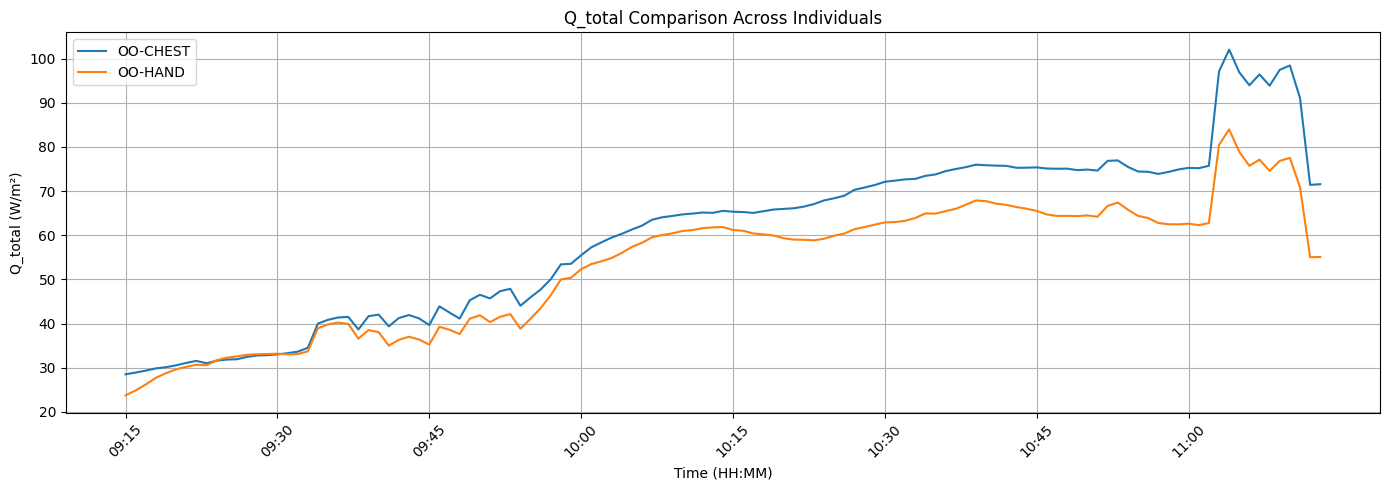

In [154]:
import matplotlib.pyplot as plt

q_components = ['Q_radi', 'Q_c_sk', 'Q_c_resp', 'Q_e_skin', 'Q_e_resp', 'Q_total']
colors = plt.cm.tab10.colors

for q_name in q_components:
    plt.figure(figsize=(14, 5))
    
    for idx, (name, df) in enumerate(df_male_oo.items()):
        # 🛠️ Zamanı datetime'a çevir ve saat:dakika olarak stringle
        df['Minute'] = pd.to_datetime(df['Minute'])
        time_labels = df['Minute'].dt.strftime('%H:%M')

        step = 15
        tick_locations = df.index[::step]
        tick_labels = time_labels.iloc[::step]

        plt.plot(time_labels, df[q_name], label=name, color=colors[idx % len(colors)])
    
    plt.title(f"{q_name} Comparison Across Individuals")
    plt.xlabel("Time (HH:MM)")
    plt.ylabel(f"{q_name} (W/m²)")
    plt.legend()
    plt.grid(True)
    plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=45)
    plt.tight_layout()
    plt.show()


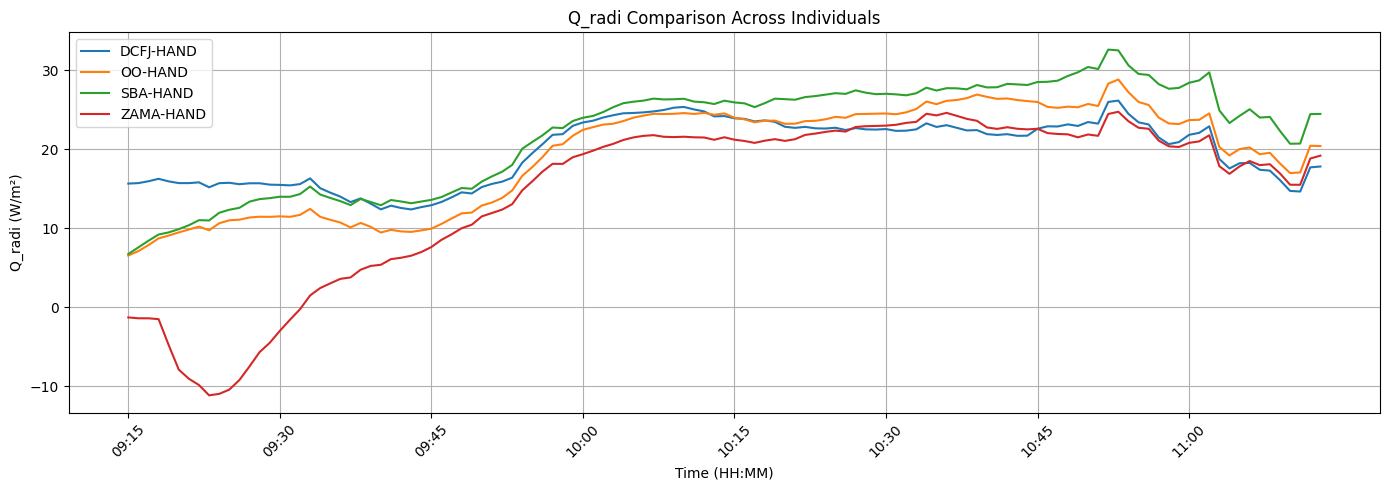

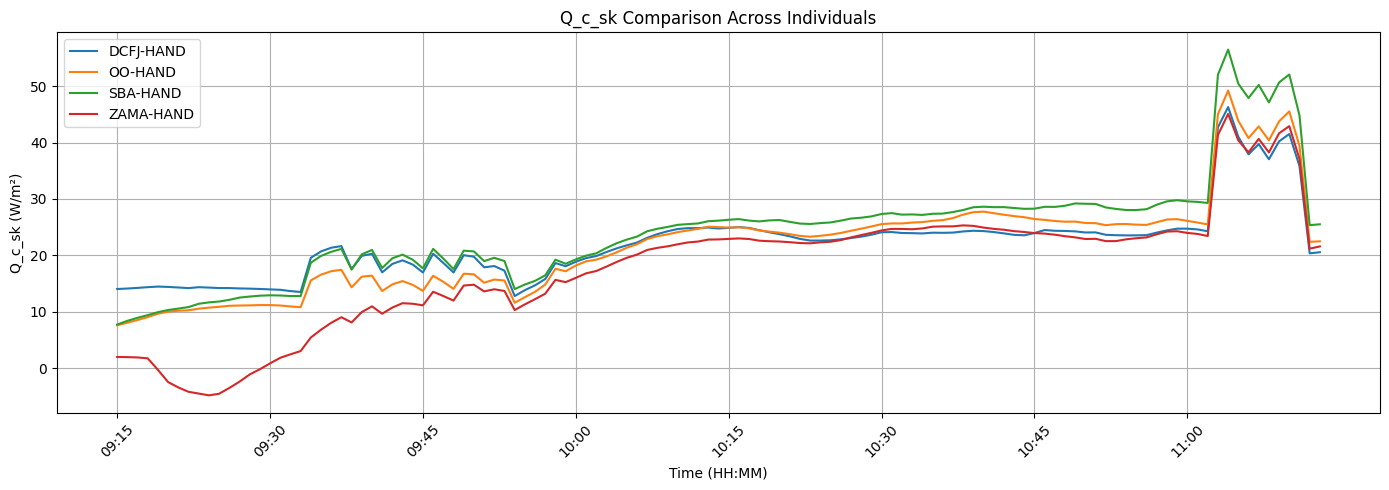

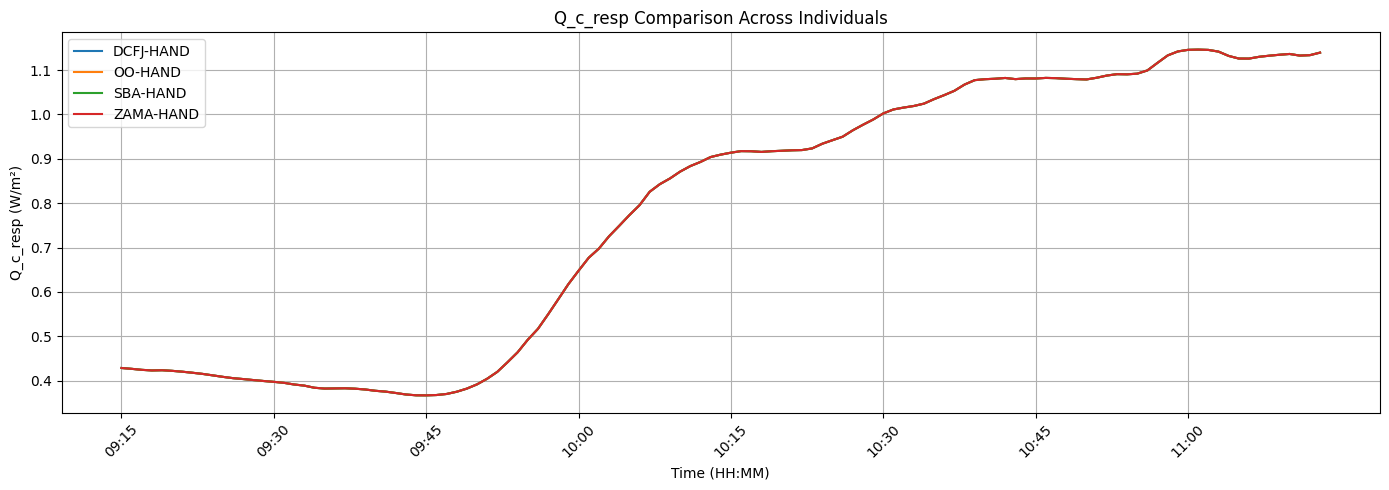

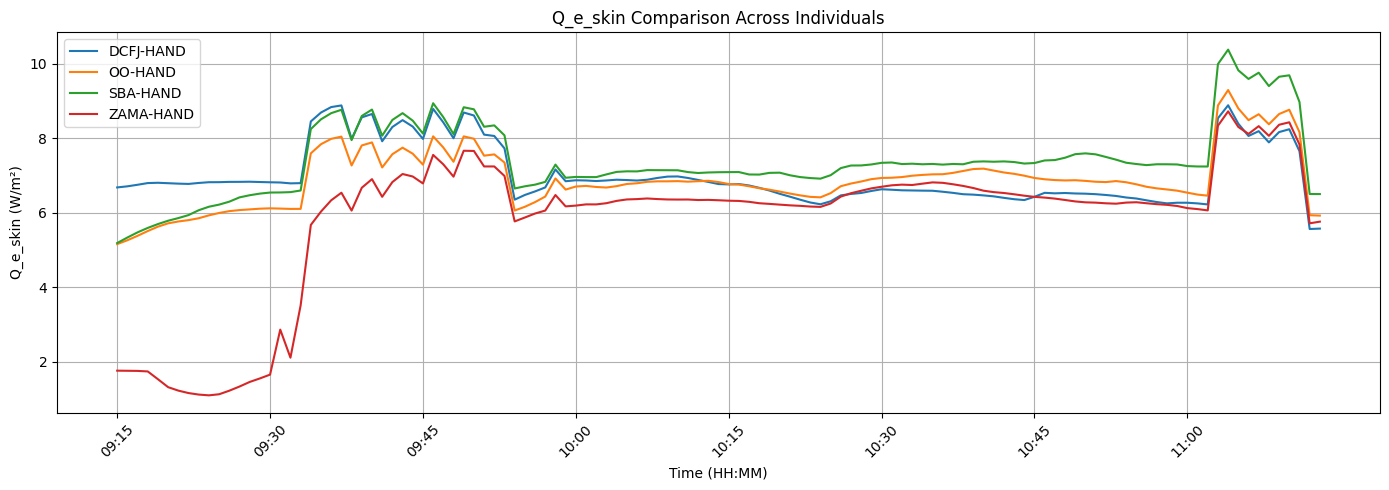

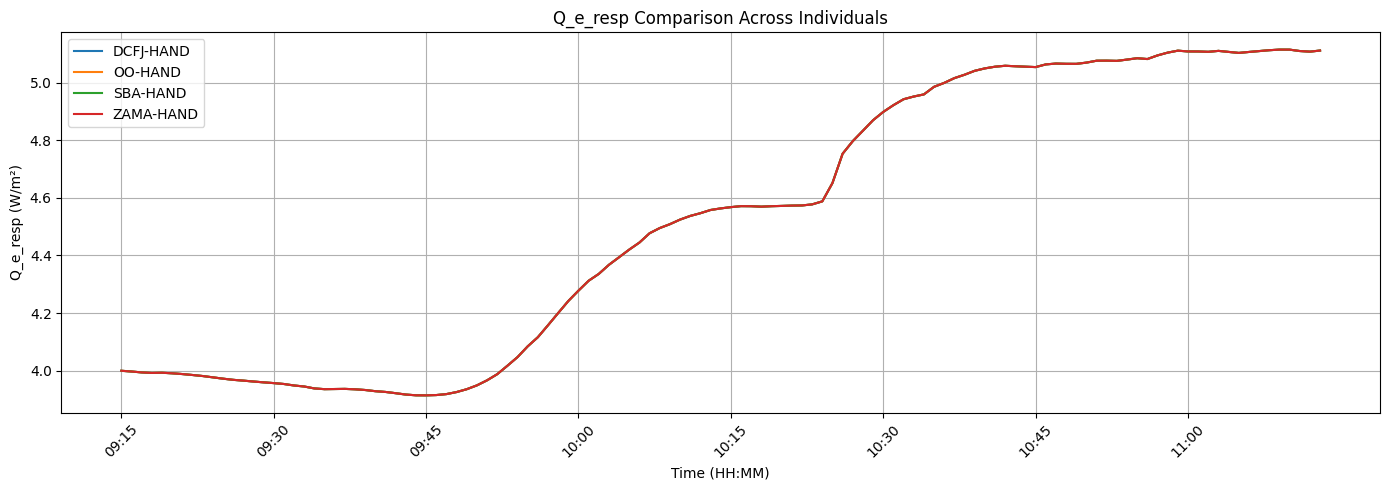

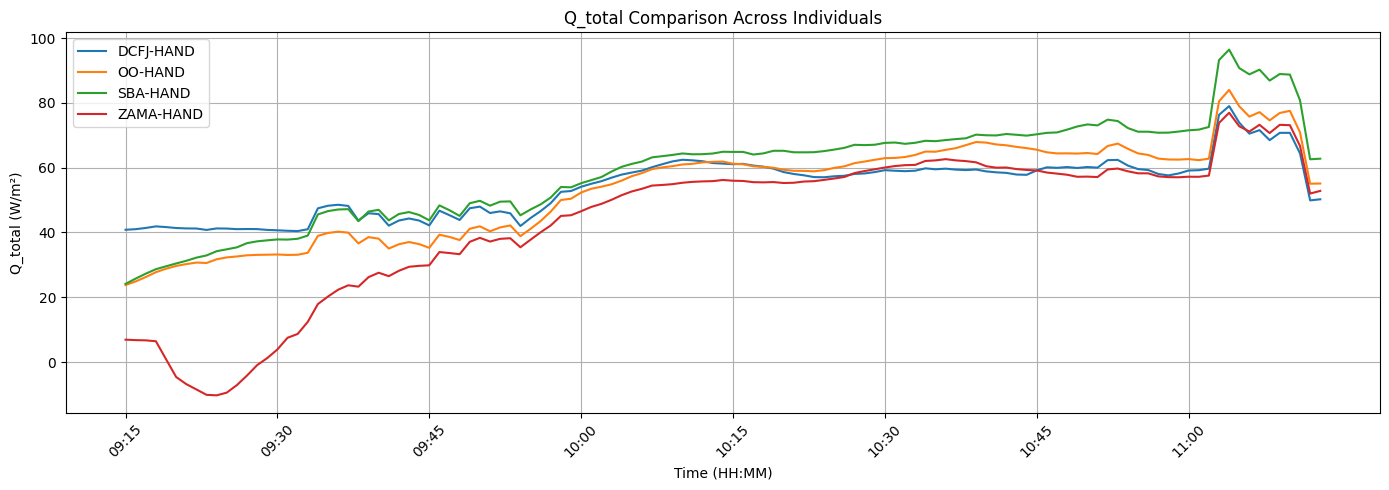

In [148]:
import matplotlib.pyplot as plt

q_components = ['Q_radi', 'Q_c_sk', 'Q_c_resp', 'Q_e_skin', 'Q_e_resp', 'Q_total']
colors = plt.cm.tab10.colors

for q_name in q_components:
    plt.figure(figsize=(14, 5))
    
    for idx, (name, df) in enumerate(hand_q_dict.items()):
        # 🛠️ Zamanı datetime'a çevir ve saat:dakika olarak stringle
        df['Minute'] = pd.to_datetime(df['Minute'])
        time_labels = df['Minute'].dt.strftime('%H:%M')

        step = 15
        tick_locations = df.index[::step]
        tick_labels = time_labels.iloc[::step]

        plt.plot(time_labels, df[q_name], label=name, color=colors[idx % len(colors)])
    
    plt.title(f"{q_name} Comparison Across Individuals")
    plt.xlabel("Time (HH:MM)")
    plt.ylabel(f"{q_name} (W/m²)")
    plt.legend()
    plt.grid(True)
    plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=45)
    plt.tight_layout()
    plt.show()

In [83]:
t_cl, h_rad, Q_radi, Q_conv = iterate_T_cl(t_skin, t_air, t_mrt, I_cl, v_a, epsilon=0.95, max_iter=100, tol=0.01)
print(df['Minute'][3])

2025-03-14 11:15:00


In [40]:
print("Radiative heat transfer is ", Q_radi, "W/m2 \nConvective heat loss from the body is ", Q_conv, "W/m2")

Radiative heat transfer is  6.23453003558336 W/m2 
Convective heat loss from the body is  7.409874701365047 W/m2


In [41]:
Q_c_resp = Q_conv_resp(M, t_air)

In [42]:
print("Convective heat loss via respiration is", Q_c_resp, "W/m2")

Convective heat loss via respiration is 0.42843813599999986 W/m2


In [55]:
a = calculate_all_Q_E_skin(t_skin, t_core, Lv, R_v_cl, f_cl, h_conv, t_air, RH, alpha=0.2)
display(a['Q_E_skin'])

5.1079857872856085

In [44]:
Q_e_resp = calculate_Q_evap_resp(M, p_v_a)
print("Evaporative heat losses via respiration is ", Q_e_resp, " W/m2")

Evaporative heat losses via respiration is  3.999812143631639  W/m2


In [45]:
display(p_v_a)

1.8974396205712427